# SETTING UP THE ENVIRONMENT

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import cv2 as cv
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve, sobel
from scipy.ndimage import shift, rotate
from skimage import data, color
from PIL import Image

<ipython-input-18-638f9f62d326>:6: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve, sobel
<ipython-input-18-638f9f62d326>:6: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve, sobel
<ipython-input-18-638f9f62d326>:6: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve, sobel
<ipython-input-18-638f9f62d326>:6: DeprecationWarning: Please import `sobel` from the `scipy.ndimage` namesp

# Hary Corner Detector

In [19]:
def HarrisCornerDetect(img,sigma_w=1,k=0.04,teta=0.1,s=5): #sigma_w is to smooth
  # step 1
  #Ix = gaussian_filter1d(img,sigma = sigma_d,order = 1,axis = 1) #Derivative on x
  #Iy = gaussian_filter1d(img,sigma = sigma_d,order = 1,axis = 0) #Derivative on y
  Ix = cv2.Sobel(img, cv2.CV_64F, 1,0,ksize=3) #Derivative on x
  Iy = cv2.Sobel(img, cv2.CV_64F, 0,1,ksize=3) #Derivative on y
  # plt.figure(figsize=(10,5))
  # plt.subplot(1,2,1)
  # plt.imshow(Ix,cmap='gray')
  # plt.title('Ix')
  # plt.subplot(1,2,2)
  # plt.imshow(Iy,cmap='gray')
  # plt.title('Iy')
  # step 2
  Ix2 = Ix**2
  Iy2 = Iy**2
  IxIy = Ix*Iy
  # plt.figure(figsize=(10,5))
  # plt.subplot(1,3,1)
  # plt.imshow(Ix2,cmap='gray')
  # plt.title('Ix2')
  # plt.subplot(1,3,2)
  # plt.imshow(Iy,cmap='gray')
  # plt.title('Iy2')
  # plt.subplot(1,3,3)
  # plt.imshow(IxIy,cmap='gray')
  # plt.title('IxIy')

  # step 3
  Ix2smooth = gaussian_filter(Ix2, sigma=sigma_w) # We use the 2-dimensional Gausian filter from scipy
  Iy2smooth = gaussian_filter(Iy2, sigma=sigma_w)
  IxIysmooth = gaussian_filter(IxIy, sigma=sigma_w)
  # plt.figure(figsize=(10,5))
  # plt.subplot(1,3,1)
  # plt.imshow(Ix2smooth,cmap='gray')
  # plt.title('Ix2smooth')
  # plt.subplot(1,3,2)
  # plt.imshow(Iy2smooth,cmap='gray')
  # plt.title('Iy2smooth')
  # plt.subplot(1,3,3)
  # plt.imshow(IxIysmooth,cmap='gray')
  # plt.title('IxIysmooth')

  # step 4
  detA = Ix2smooth * Iy2smooth - IxIysmooth**2 # because A = [[Ix2smooth,IxIysmooth],[IxIysmooth,Iy2smooth]]
  traceA = Ix2smooth + Iy2smooth # because A = [[Ix2smooth,IxIysmooth],[IxIysmooth,Iy2smooth]]
  H = detA - k*(traceA**2)
  #H = cv2.normalize(H, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title('H ')
  plt.imshow(H,cmap='gray')


  # step 5
  corners = np.zeros_like(H)
  corners[H > teta * H.max()]=1 # mask of the size of the image with only the corners
  plt.subplot(1,2,2)
  plt.title('Corners')
  plt.imshow(img,cmap='gray')
  plt.scatter(np.nonzero(corners)[1], np.nonzero(corners)[0], c='red', s=s)
  plt.show()
  return


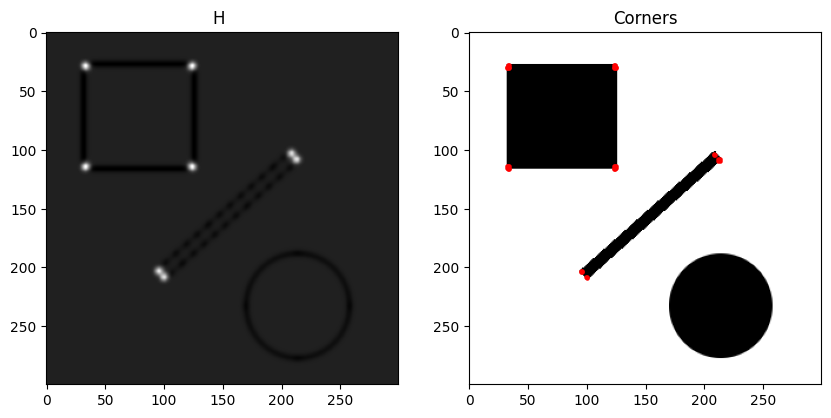

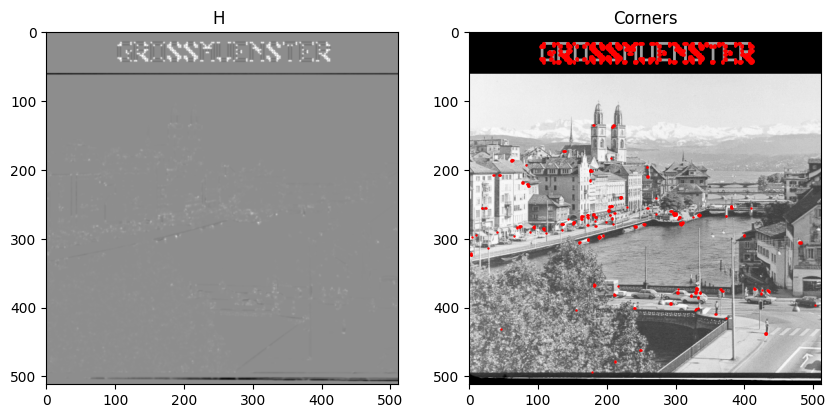

In [20]:
# Basics images
img1 = cv2.imread('/CircleLineRect.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/zurlim.png', cv2.IMREAD_GRAYSCALE)

# After fex test and according the usual value of k we established the parameter of the detector
HarrisCornerDetect(img1,sigma_w=3,k=0.04,teta=0.8)
HarrisCornerDetect(img2,sigma_w=1,k=0.04,teta=0.15,s=0.5)

238


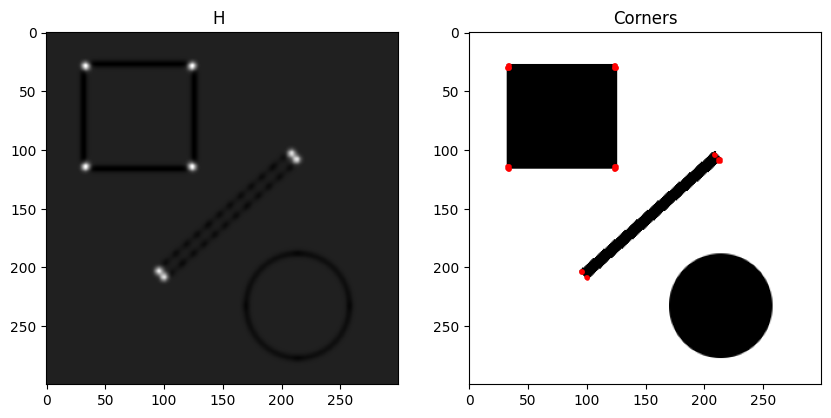

vvv basic result vvv


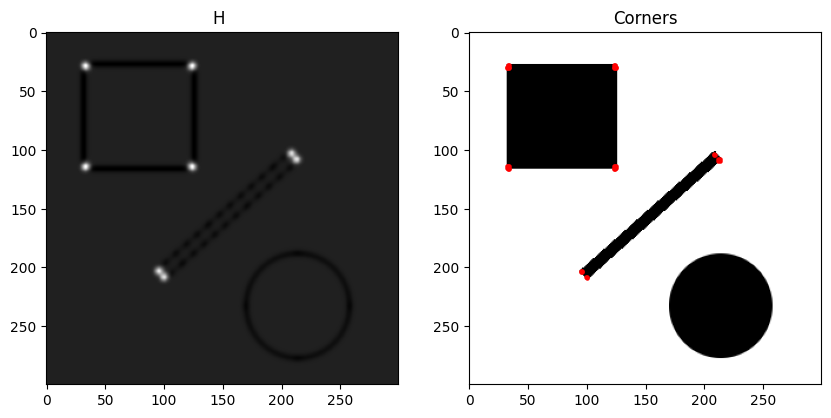

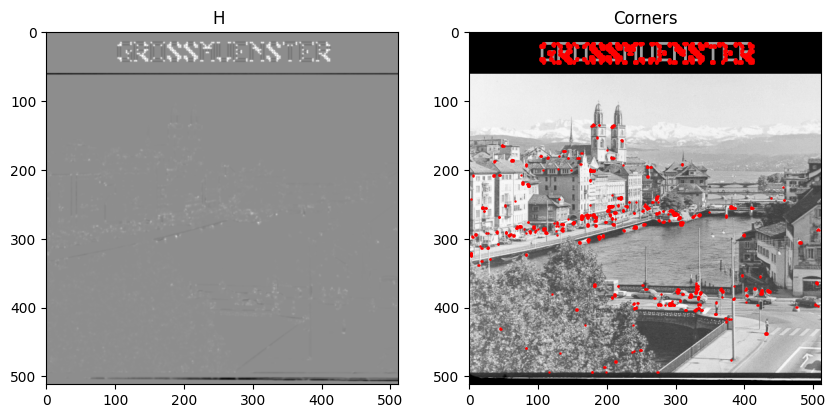

vvv basic result vvv


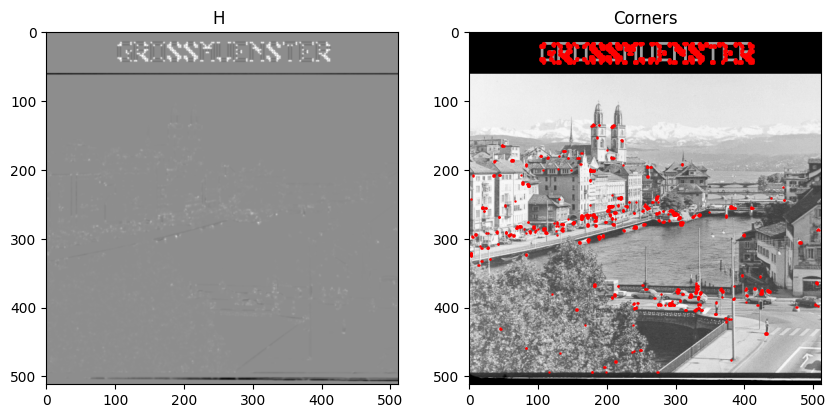

In [21]:
shiftedimg1 = np.clip(img1 + img1.max()*0.01, 0, 255).astype(np.uint8)
shiftedimg2 = np.clip(img2 + img2.max()*0.01, 0, 255).astype(np.uint8)
print(img2.max())
HarrisCornerDetect(shiftedimg1,sigma_w=3,k=0.04,teta=0.8)
print("vvv basic result vvv")
HarrisCornerDetect(img1,sigma_w=3,k=0.04,teta=0.8)
HarrisCornerDetect(shiftedimg2,sigma_w=1,k=0.04,teta=0.1,s=0.5)
print("vvv basic result vvv")
HarrisCornerDetect(img2,sigma_w=1,k=0.04,teta=0.1,s=0.5)

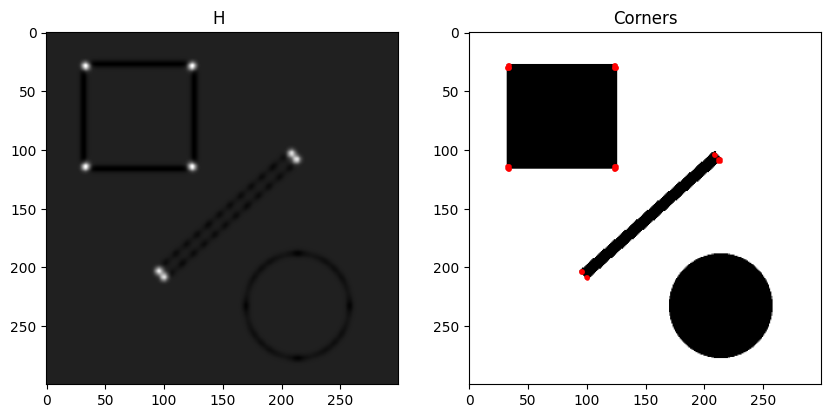

vvv basic result vvv


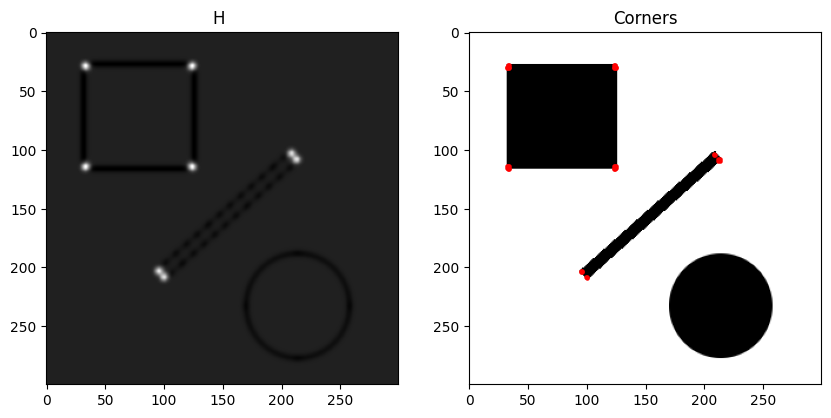

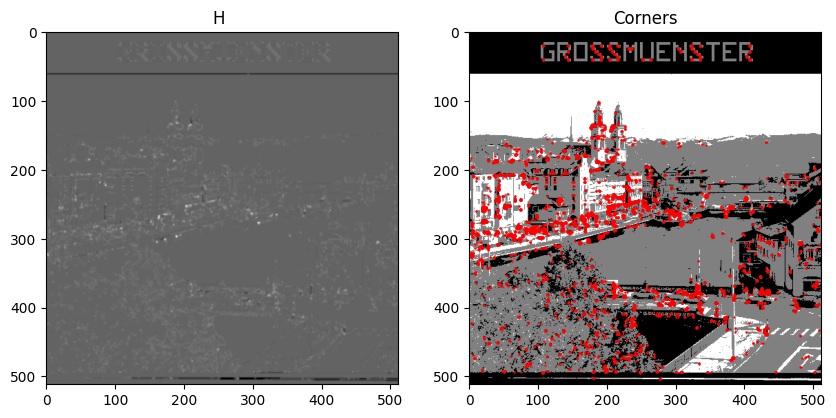

vvv basic result vvv


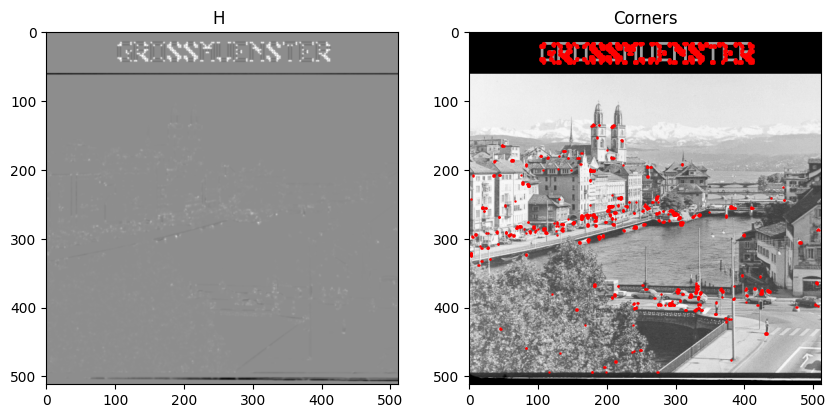

In [22]:
scaleintimg1 = np.clip(img1*0.01, 0, 255).astype(np.uint8)

scaleintimg2 = np.clip(img2*0.01, 0, 255).astype(np.uint8)

HarrisCornerDetect(scaleintimg1,sigma_w=3,k=0.04,teta=0.8)
print("vvv basic result vvv")
HarrisCornerDetect(img1,sigma_w=3,k=0.04,teta=0.8)

HarrisCornerDetect(scaleintimg2,sigma_w=1,k=0.04,teta=0.1,s=0.5)
print("vvv basic result vvv")
HarrisCornerDetect(img2,sigma_w=1,k=0.04,teta=0.1,s=0.5)

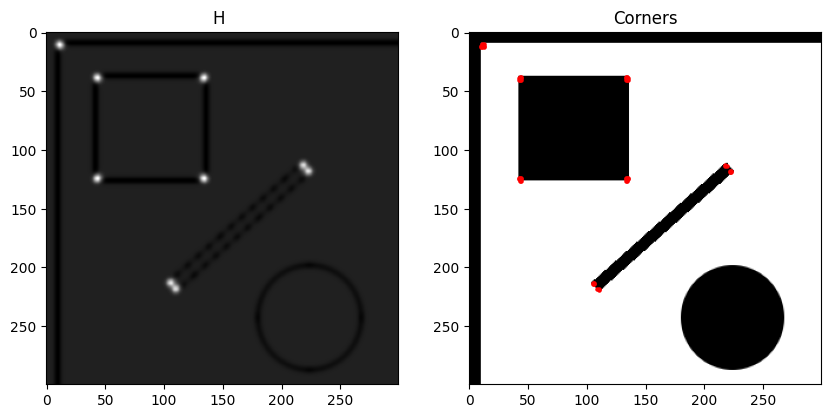

vvv basic result vvv


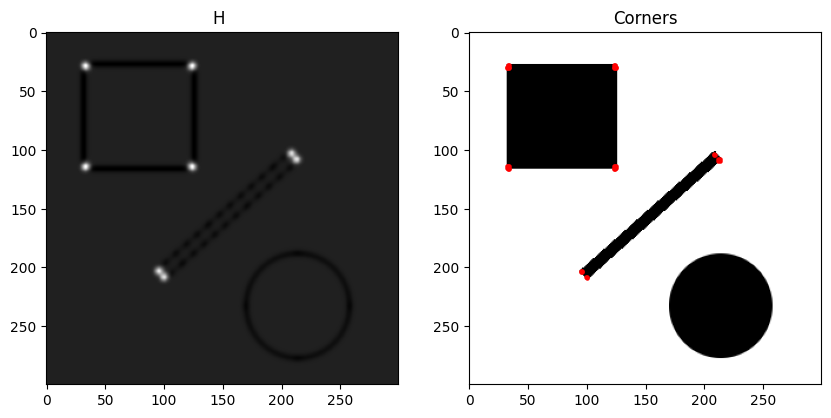

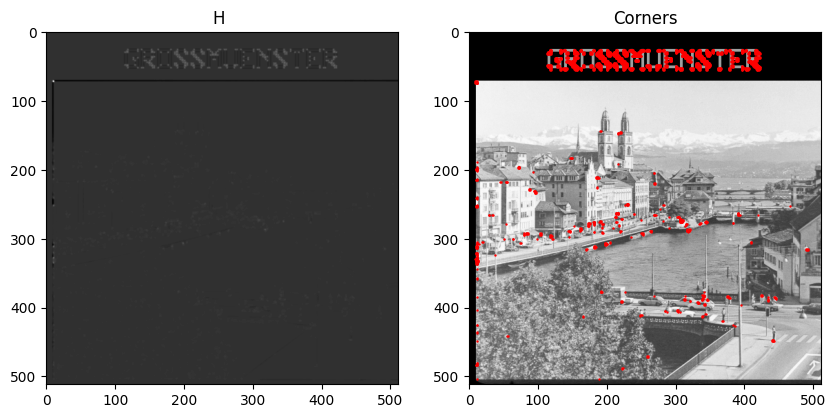

vvv basic result vvv


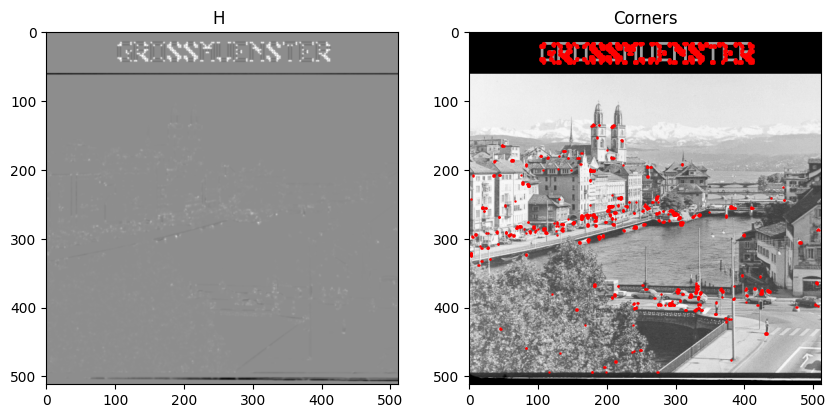

In [23]:
shiftimg1 = cv2.warpAffine(img1, np.float32([[1, 0, 10], [0, 1, 10]]), img1.shape)
shiftimg2 = cv2.warpAffine(img2, np.float32([[1, 0, 10], [0, 1, 10]]), img2.shape)


HarrisCornerDetect(shiftimg1,sigma_w=3,k=0.04,teta=0.8)
print("vvv basic result vvv")
HarrisCornerDetect(img1,sigma_w=3,k=0.04,teta=0.8)

HarrisCornerDetect(shiftimg2,sigma_w=1,k=0.04,teta=0.03,s=0.5)
print("vvv basic result vvv")
HarrisCornerDetect(img2,sigma_w=1,k=0.04,teta=0.1,s=0.5)

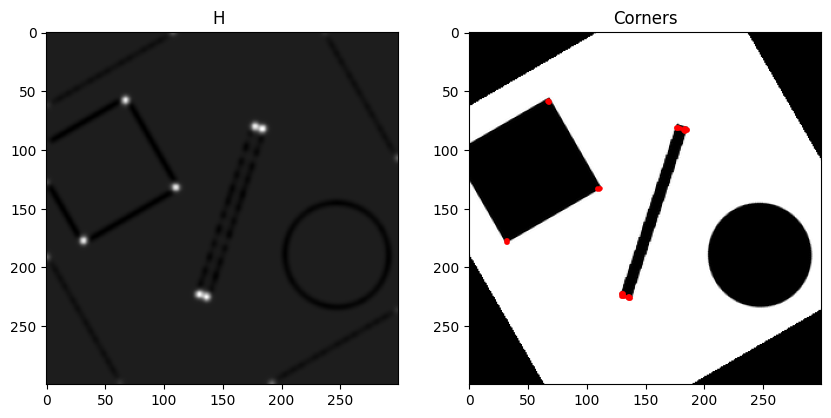

vvv basic result vvv


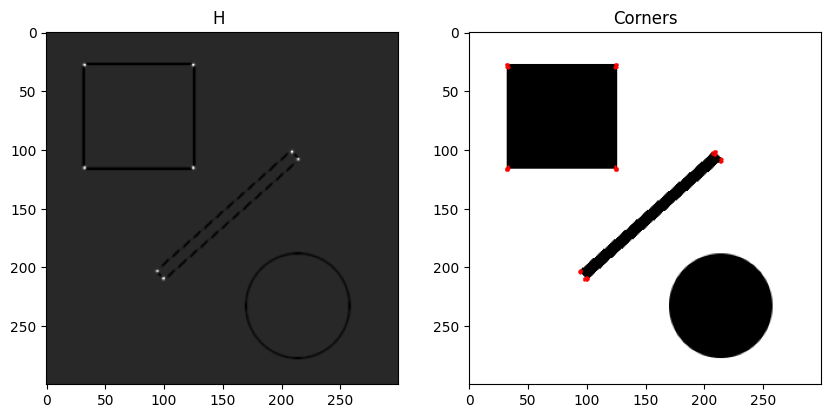

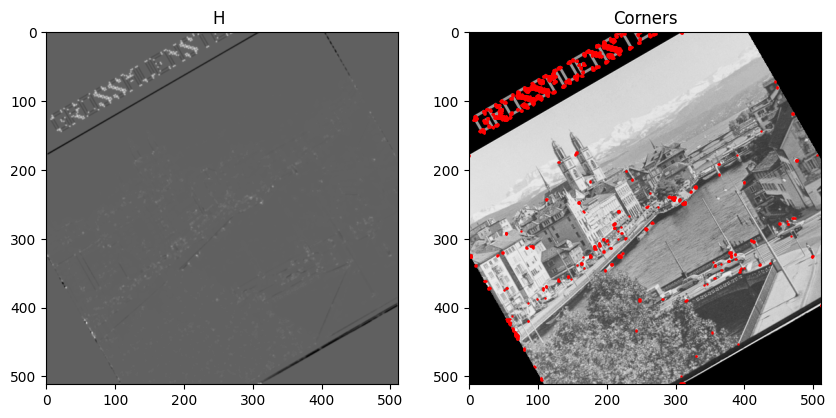

vvv basic result vvv


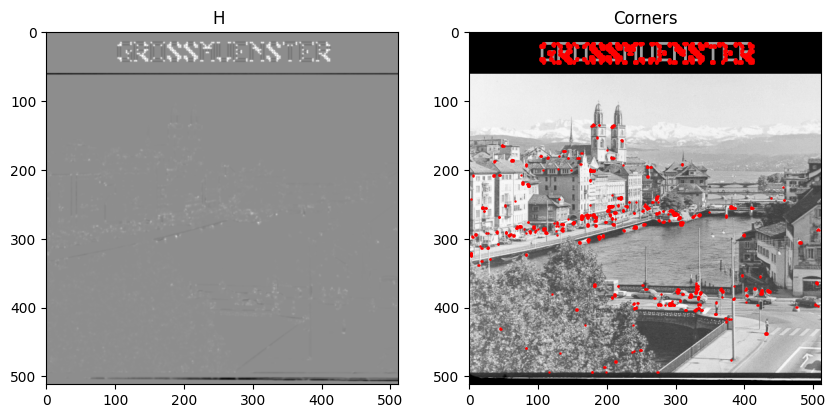

In [24]:
rotimg1 = rotate(img1, angle=30, reshape=False, order=3)
rotimg2 = rotate(img2, angle=30, reshape=False, order=3)

HarrisCornerDetect(rotimg1,sigma_w=3,k=0.04,teta=0.8)
print("vvv basic result vvv")
HarrisCornerDetect(img1,sigma_w=1,k=0.04,teta=0.1,s=0.5)

HarrisCornerDetect(rotimg2,sigma_w=1,k=0.04,teta=0.1,s=0.5)
print("vvv basic result vvv")
HarrisCornerDetect(img2,sigma_w=1,k=0.04,teta=0.1,s=0.5)

# TOOLS FUNCTIONS

In [25]:
def load_image(filename, as_float=False):
    image = np.asarray(Image.open(filename).convert('L'))
    return image

# IMPORTING IMAGES

In [27]:
#LOADING IMAGES
image_cube_left = load_image('cube_left.pgm')
image_cube_right = load_image('cube_right.pgm')
image_zurlim = load_image('zurlim.png')
image_circle = load_image('CircleLineRect.png')

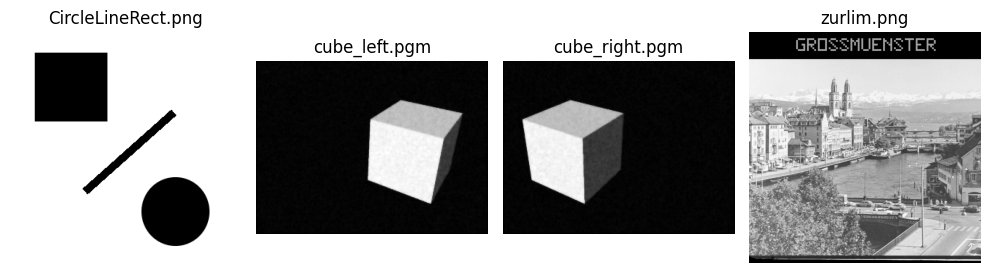

In [29]:
#DISPLAYING IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_circle,cmap='gray')
plt.title("CircleLineRect.png")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image_cube_left, cmap='gray')
plt.title("cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(image_cube_right, cmap='gray')
plt.title("cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image_zurlim,cmap='gray')
plt.title("zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

# STEP 1 : GAUSSIAN SMOOTHING

In [30]:
# STEP 1 : GAUSSIAN SMOOTHING
# The image input is smoothed by gaussian filter to reduce noise
# Sigma control the intensity of smoothing
sigma_smoothing = 1
kernel = (5,5)
smoothed_cube_left = cv.GaussianBlur(image_cube_left, kernel,sigma_smoothing)
smoothed_cube_right = cv.GaussianBlur(image_cube_right, kernel,sigma_smoothing)
smoothed_zurlim = cv.GaussianBlur(image_zurlim, kernel,sigma_smoothing)
smoothed_circle = cv.GaussianBlur(image_circle, kernel,sigma_smoothing)

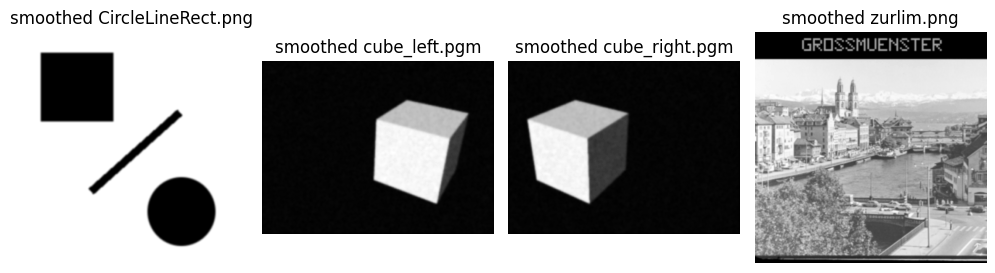

In [31]:
#DISPLAYING SMOOTHED IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(smoothed_circle,cmap='gray')
plt.title("smoothed CircleLineRect.png")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(smoothed_cube_left, cmap='gray')
plt.title("smoothed cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(smoothed_cube_right, cmap='gray')
plt.title("smoothed cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(smoothed_zurlim,cmap='gray')
plt.title("smoothed zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

# STEP 2 : GRADIENT CALCULATION

In [32]:
# STEP 2 : GRADIENT CALCULATION
# In this step we calculate partial derivative Ix and Iy to approximate the image's gradient in horizontal and vertical directions
# Ix and Ix represent the variation in light intensity in the image about direction
# Ix : intensity change from left to right
# Iy : intensity change from top to bottom
Ix_cube_left = cv.Sobel(smoothed_cube_left,cv.CV_64F,1,0,ksize=5)
Iy_cube_left = cv.Sobel(smoothed_cube_left,cv.CV_64F,0,1,ksize=5)

Ix_cube_right = cv.Sobel(smoothed_cube_right,cv.CV_64F,1,0,ksize=5)
Iy_cube_right = cv.Sobel(smoothed_cube_right,cv.CV_64F,0,1,ksize=5)

Ix_zurlim = cv.Sobel(smoothed_zurlim,cv.CV_64F,1,0,ksize=5)
Iy_zurlim = cv.Sobel(smoothed_zurlim,cv.CV_64F,0,1,ksize=5)

Ix_circle = cv.Sobel(smoothed_circle,cv.CV_64F,1,0,ksize=5)
Iy_circle = cv.Sobel(smoothed_circle,cv.CV_64F,0,1,ksize=5)

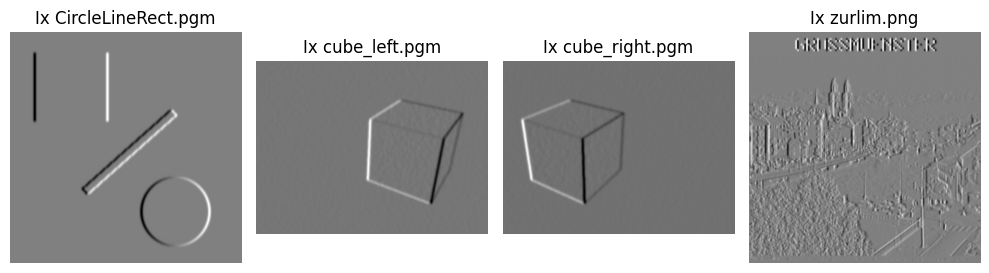

In [33]:
#DISPLAYING Ix IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(Ix_circle, cmap='gray')
plt.title("Ix CircleLineRect.pgm")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Ix_cube_left, cmap='gray')
plt.title("Ix cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Ix_cube_right, cmap='gray')
plt.title("Ix cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(Ix_zurlim,cmap='gray')
plt.title("Ix zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

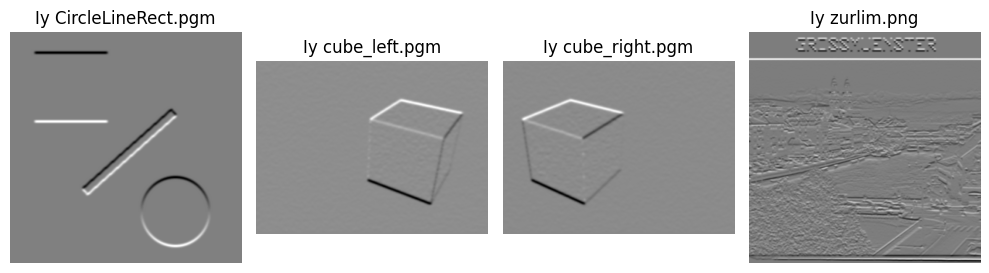

In [34]:
#DISPLAYING Iy IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(Iy_circle, cmap='gray')
plt.title("Iy CircleLineRect.pgm")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Iy_cube_left, cmap='gray')
plt.title("Iy cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Iy_cube_right, cmap='gray')
plt.title("Iy cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(Iy_zurlim,cmap='gray')
plt.title("Iy zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

# STEP 3 : DIRECTION AND MAGNITUDE GRADIENT CALCULATION

In [35]:
# STEP 3 : DIRECTION AND MAGNITUDE GRADIENT CALCULATION
# We compute the direction of the gradient and the magnitude of gradient at each point in the image
# Magnitude is the ‘strength’ of the contour, it tells us how abruptly the intensity changes at that point
# Direction tells us the orientation of the contour at this pixel

gradient_direction_cube_left = np.arctan2(Iy_cube_left, Ix_cube_left)
gradient_magnitude_cube_left = np.sqrt(Ix_cube_left**2 + Iy_cube_left**2)

gradient_direction_cube_right = np.arctan2(Iy_cube_right, Ix_cube_right)
gradient_magnitude_cube_right = np.sqrt(Ix_cube_right**2 + Iy_cube_right**2)

gradient_direction_zurlim = np.sqrt(Ix_zurlim**2 + Iy_zurlim**2)
gradient_magnitude_zurlim = np.arctan2(Iy_zurlim, Ix_zurlim)

gradient_direction_circle = np.sqrt(Ix_circle**2 + Iy_circle**2)
gradient_magnitude_circle = np.arctan2(Iy_circle, Ix_circle)

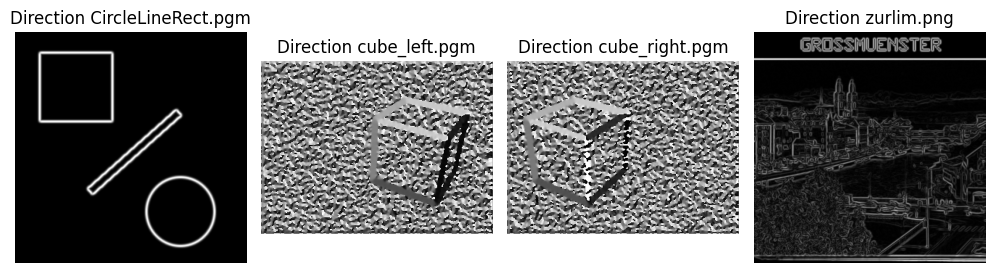

In [36]:
#DISPLAYING GRADIENT DIRECTION IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(gradient_direction_circle, cmap='gray')
plt.title("Direction CircleLineRect.pgm")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gradient_direction_cube_left, cmap='gray')
plt.title("Direction cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gradient_direction_cube_right, cmap='gray')
plt.title("Direction cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gradient_direction_zurlim,cmap='gray')
plt.title("Direction zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

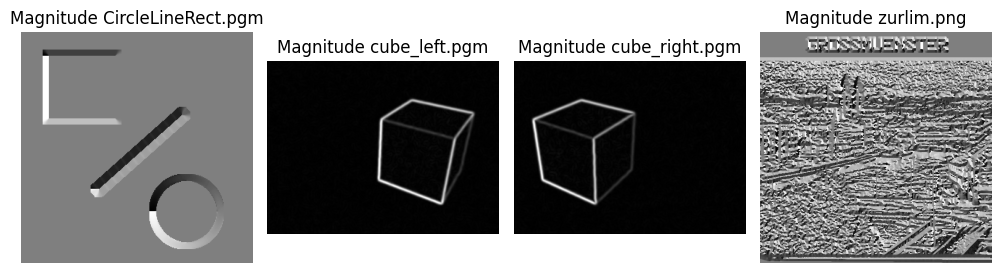

In [37]:
#DISPLAYING GRADIENT MAGNITUDE IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(gradient_magnitude_circle, cmap='gray')
plt.title("Magnitude CircleLineRect.pgm")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gradient_magnitude_cube_left, cmap='gray')
plt.title("Magnitude cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gradient_magnitude_cube_right, cmap='gray')
plt.title("Magnitude cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gradient_magnitude_zurlim,cmap='gray')
plt.title("Magnitude zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

# STEP 4 : NON-MAXIMUM SUPPRESSION FOR CANDIDATE EDGES

In [38]:
# STEP 4 : NON-MAXIMUM SUPPRESSION FOR CANDIDATE EDGES
def step4(gradient_magnitude, gradient_direction, threshold):
    # Minimise contours by retaining only those pixels where the gradient is a local maximum in the direction of the gradient
    rows, cols = gradient_magnitude.shape
    candidate_edges = np.zeros((rows, cols), dtype=np.float32)
    angle = gradient_direction * 180.0 / np.pi

    #for i in range(angle.shape[0]):
      #for j in range(angle.shape[1]):
          ## If the angle is negative we add 180 degrees
          #if angle[i, j] < 0:
              #angle[i, j] += 180
    # More short code :
    angle[angle < 0] += 180

    # Each pixel is classified into four main directions: horizontal, vertical and the two diagonals
    # The angles 22.5, 67.5, 112.5, and 157.5 are boundaries that define ranges around
    # the main directions 0°, 45°, 90°, 135°, and 180° for edge classification
    # 0° ===> [-22.5°, 22.5° ]
    # 45° ==> [ 22.5°, 67.5° ]
    # 90° ==> [ 67.5°, 112.5°]
    # 135° => [112.5°, 157.5°]
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
          if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
              n1 = gradient_magnitude[i , j + 1]
              n2 = gradient_magnitude[i , j - 1]
          elif 22.5 <= angle[i, j] < 67.5:
              n1 = gradient_magnitude[i + 1, j - 1]
              n2 = gradient_magnitude[i - 1, j + 1]
          elif 67.5 <= angle[i, j] < 112.5:
              n1 = gradient_magnitude[i + 1, j]
              n2 = gradient_magnitude[i - 1 , j]
          elif 112.5 <= angle[i, j] < 157.5:
              n1 = gradient_magnitude[i - 1, j - 1]
              n2 = gradient_magnitude[i + 1, j + 1]

          if (gradient_magnitude[i, j] >= n1) and (gradient_magnitude[i, j] >= n2):
              candidate_edges[i, j] = gradient_magnitude[i, j]
          else:
              candidate_edges[i, j] = 0

    # STEP 5 : THRESHOLDING
    edges = np.zeros_like(candidate_edges)
    edges[candidate_edges > threshold * candidate_edges.max()]=1

    return edges

In [39]:
cube_left_edges = step4(gradient_magnitude_cube_left, gradient_direction_cube_left, 0.1)
cube_right_edges = step4(gradient_magnitude_cube_right, gradient_direction_cube_right, 0.1)
zurlim_edges = step4(gradient_magnitude_zurlim, gradient_direction_zurlim, 0.1)
circle_edges = step4(gradient_magnitude_circle, gradient_direction_circle, 0.1)

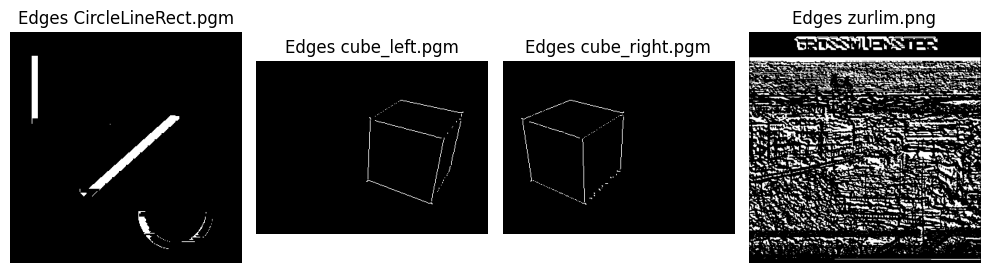

In [40]:
#DISPLAYING GRADIENT EDGES IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(circle_edges, cmap='gray')
plt.title("Edges CircleLineRect.pgm")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cube_left_edges, cmap='gray')
plt.title("Edges cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cube_right_edges, cmap='gray')
plt.title("Edges cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(zurlim_edges,cmap='gray')
plt.title("Edges zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
def CannyEdgeDetector(image, sigma_smoothing, sigma_gradient_calculation, threshold):

    # STEP 1 : GAUSSIAN SMOOTHING
    # The image input is smoothed by gaussian filter to reduce noise
    # Sigma control the intensity of smoothing
    smoothed_image = gaussian_filter(image, sigma_smoothing)

    # STEP 2 : GRADIENT CALCULATION
    # In this step we calculate partial derivative Ix and Iy to approximate the image's gradient in horizontal and vertical directions
    # Ix and Ix represent the variation in light intensity in the image about direction
    # Ix : intensity change from left to right
    # Iy : intensity change from top to bottom
    Ix = gaussian_filter1d(smoothed_image, sigma_gradient_calculation, order = 1, axis = 1)
    Iy = gaussian_filter1d(smoothed_image, sigma_gradient_calculation, order = 1, axis = 0)

    # STEP 3 : DIRECTION AND MAGNITUDE GRADIENT CALCULATION
    # We compute the direction of the gradient and the magnitude of gradient at each point in the image
    # Magnitude is the ‘strength’ of the contour, it tells us how abruptly the intensity changes at that point
    # Direction tells us the orientation of the contour at this pixel
    gradient_direction = np.arctan2(Iy, Ix)
    gradient_magnitude = np.sqrt(Ix**2 + Iy**2)


    # STEP 4 : NON-MAXIMUM SUPPRESSION FOR CANDIDATE EDGES
    # Minimise contours by retaining only those pixels where the gradient is a local maximum in the direction of the gradient
    rows, cols = gradient_magnitude.shape
    candidate_edges = np.zeros((rows, cols), dtype=np.float32)
    angle = gradient_direction * 180.0 / np.pi

    #for i in range(angle.shape[0]):
      #for j in range(angle.shape[1]):
          ## If the angle is negative we add 180 degrees
          #if angle[i, j] < 0:
              #angle[i, j] += 180
    # More short code :
    angle[angle < 0] += 180

    # Each pixel is classified into four main directions: horizontal, vertical and the two diagonals
    # The angles 22.5, 67.5, 112.5, and 157.5 are boundaries that define ranges around
    # the main directions 0°, 45°, 90°, 135°, and 180° for edge classification
    # 0° ===> [-22.5°, 22.5° ]
    # 45° ==> [ 22.5°, 67.5° ]
    # 90° ==> [ 67.5°, 112.5°]
    # 135° => [112.5°, 157.5°]
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
          if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
              n1 = gradient_magnitude[i, j + 1]
              n2 = gradient_magnitude[i, j - 1]
          elif 22.5 <= angle[i, j] < 67.5:
              n1 = gradient_magnitude[i + 1, j - 1]
              n2 = gradient_magnitude[i - 1, j + 1]
          elif 67.5 <= angle[i, j] < 112.5:
              n1 = gradient_magnitude[i + 1, j]
              n2 = gradient_magnitude[i - 1, j]
          elif 112.5 <= angle[i, j] < 157.5:
              n1 = gradient_magnitude[i - 1, j - 1]
              n2 = gradient_magnitude[i + 1, j + 1]

          if (gradient_magnitude[i, j] >= n1) and (gradient_magnitude[i, j] >= n2):
              candidate_edges[i, j] = gradient_magnitude[i, j]
          else:
              candidate_edges[i, j] = 0

    # STEP 5 : THRESHOLDING
    edges = np.zeros_like(candidate_edges)
    edges[candidate_edges > threshold * candidate_edges.max()]=1

    return edges

In [42]:
cube_left_edges = CannyEdgeDetector(image_cube_left, 0.5, 1, 0.6)
cube_right_edges = CannyEdgeDetector(image_cube_right, 0.5, 1, 0.6)
zurlim_edges = CannyEdgeDetector(image_zurlim, 2, 2, 0.3)
circle_edges = CannyEdgeDetector(image_circle, 1.5, 1, 0.9)

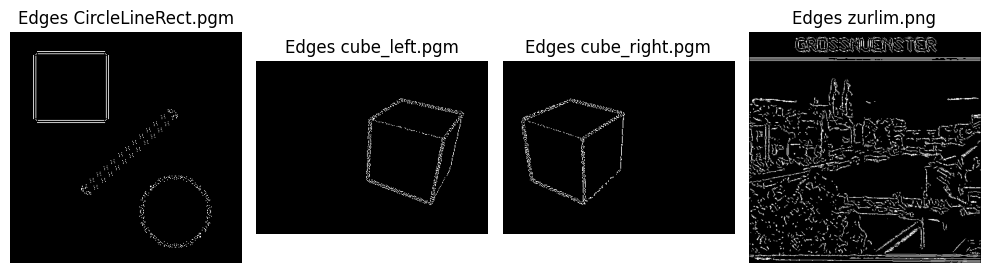

In [43]:
#DISPLAYING GRADIENT EDGES IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(circle_edges, cmap='gray')
plt.title("Edges CircleLineRect.pgm")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cube_left_edges, cmap='gray')
plt.title("Edges cube_left.pgm")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cube_right_edges, cmap='gray')
plt.title("Edges cube_right.pgm")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(zurlim_edges,cmap='gray')
plt.title("Edges zurlim.png")
plt.axis('off')

plt.tight_layout()
plt.show()